### Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Creating Arrays
a1 = np.array([1, 2, 3, 4, 5])
a2 = np.zeros(10)
a3 = np.ones(11)
a4 = np.random.random(10)
a5 = np.random.randn(11)
a6 = np.linspace(1, 10, 10)
a7 = np.arange(1, 10, 3)

a6


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

#### Array Operations 

In [17]:
# Scalar Operations
a1 * 2
a1 / 2
a1 ** 2


array([ 1,  4,  9, 16, 25])

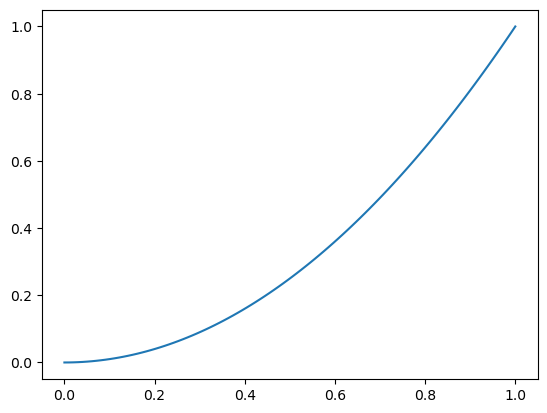

In [33]:
# Lets plot a curve
import math

x = np.linspace(0, 1, 100)
y = x ** 2

plt.plot(x, y)

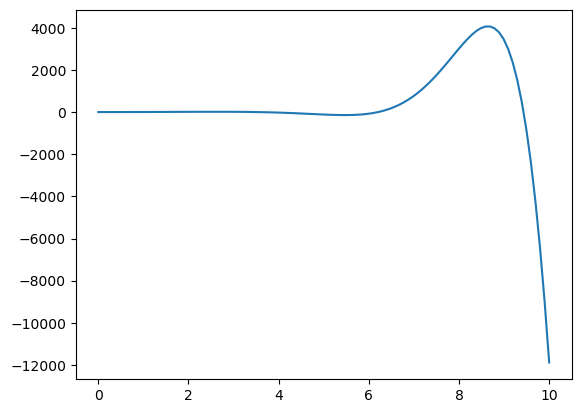

In [35]:
def f(x):
    return x ** 2 + np.sin(x) / np.exp(-x)

x = np.linspace(0, 10, 100)

y = f(x)

plt.plot(x, y)

In [57]:
a1 = np.array([1, 2, 3, 4, 5, 6])
# Vectorize basically takes each element and performs the following function
a2 = np.vectorize(lambda a: a ** 2)(a1)
print(a2)

a1[a1 > 3]

names = np.array(["Atharva", "Swara", "Rahul", "Raj"])

f = lambda s: s[0]

first_letter_j = np.vectorize(lambda s: s[0])(names) == 'A'
names[first_letter_j]


[ 1  4  9 16 25 36]


array(['Atharva'], dtype='<U7')

### Calculus and Statistical Functions

In [67]:
# np.random.randn gives random values with standard deviation 1 and mean as 0
# Multiplying with 2 means the standard deviation is now 2
# Adding with 10 shifts the mean to the right so the value is closer to 10 then farhter away so mean shoud give approx 10
a1 = 2 * np.random.randn(10) + 10

np.mean(a1)
np.std(a1)

# Finding percentile
np.percentile(a1, 80)

11.626337691708665

[ 1  3  6 10]


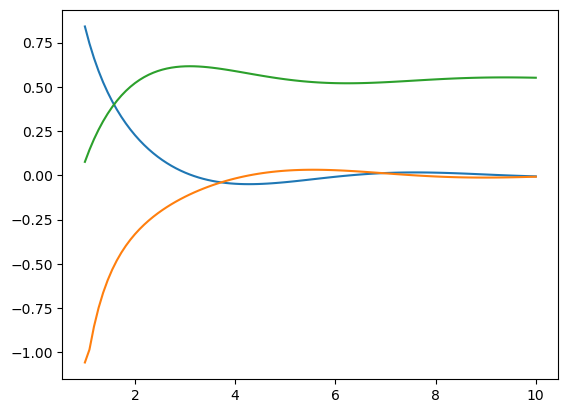

In [76]:
x = np.linspace(1, 10, 100)

y = 1/x ** 2 * np.sin(x)

plt.plot(x, y)

dydx = np.gradient(y, x)

plt.plot(x, dydx)

# cumsum is cumulative summation 
print(np.cumsum(np.array([1, 2, 3, 4])))
y_int = np.cumsum(y) * (x[1] - x[0]) # This is the dx we always write in integrals

plt.plot(x, y_int)


##### Question 1

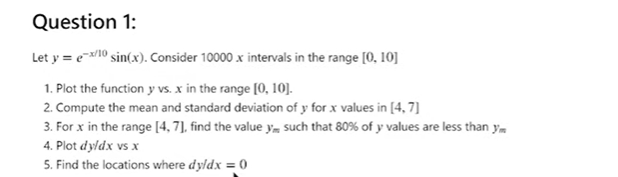

In [79]:
# 0. 
N = 10000
x = np.linspace(0, 10, N+1) # Always do N+1
y = np.exp(-x/10) * np.sin(x)

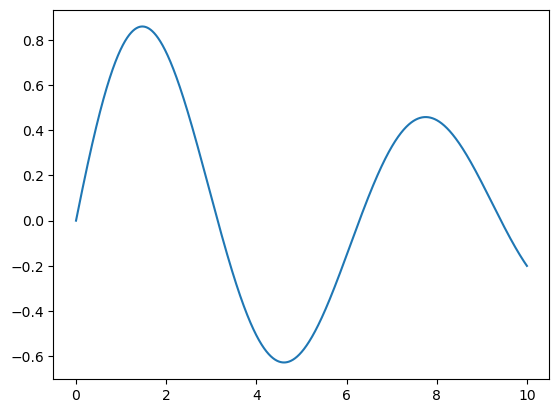

In [80]:
# 1.
plt.plot(x, y)

In [98]:
# 2. We multiply both to get true
np.mean(y[(x >= 4) * (x <= 7)])
np.std(y[(x >= 4) * (x <= 7)])

0.4398295912558841

In [100]:
# 3. 
ym = np.percentile(y[(x >= 4) * (x <= 7)], 80)
ym

0.4613885869666762

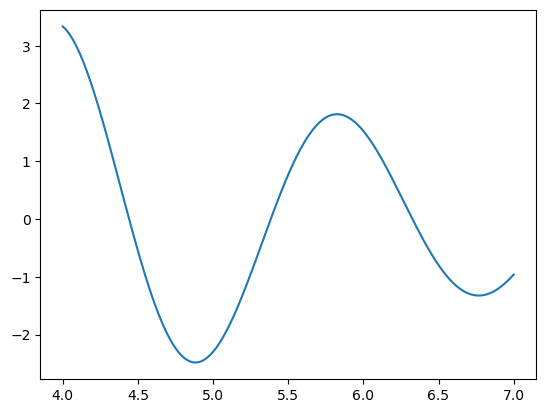

In [105]:
# 4. 
dydx = np.gradient(y, x)
plt.plot(x, dydx)

In [120]:
# 5.
# Here all the values above 0, when you multiply consecutive elements we get positive result 
# Same goes for values below 0, when you multiply consecutive elements we get positive result because -1 * -1 = +1
# But when we muliply 2 opposite signed values we get negative answers. So to find where 0 lies we need to find where the value becomes negative

# First we multiply consectutive numbers
# Then we see where the value is 0
# This way you found the roots of the function
x[1:][dydx[1:] * dydx[:-1] < 0]


array([4.4416, 5.3839, 6.3265])

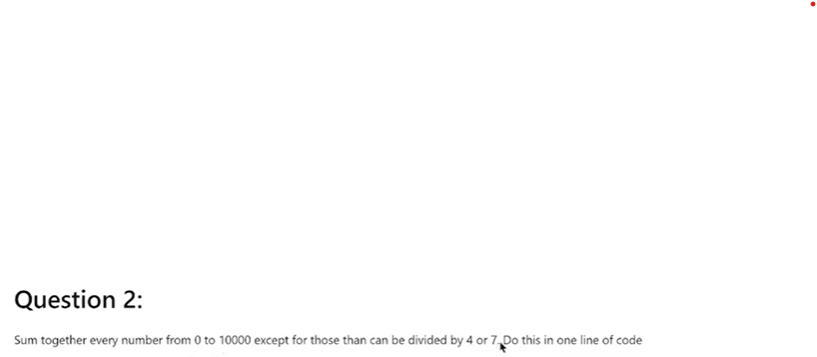

In [135]:
x = np.arange(0, 10000, 1)
sum(x[(x % 4 != 0) * (x % 7 != 0)])

32147142

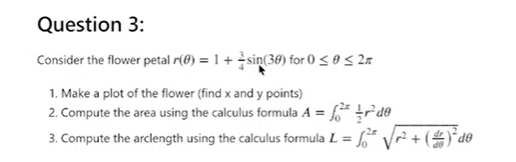

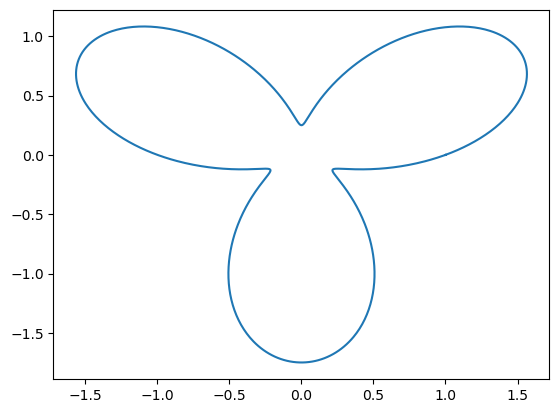

In [140]:
# 1. 

theta = np.linspace(0, 2*np.pi, 1000)
r = 1 + 3/4 * np.sin(3 * theta)

# You have learnt this formula in JEE
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.plot(x, y)

In [138]:
# 2. 
y_int = np.cumsum(y) * theta[1] - theta[0]
y_int

array([0.12822827, 0.29254642, 0.48767932, 0.70384776, 0.92819782,
       1.14667973, 1.34610143, 1.51605682, 1.6504468 , 1.74837074,
       1.8142581 , 1.85722105, 1.88972252, 1.92575455, 1.97879314,
       2.05982852, 2.17575869, 2.32838123, 2.51413051, 2.72459889,
       2.94776562, 3.16975388, 3.37685911, 3.55755213, 3.70416435,
       3.81400867, 3.88977219, 3.93912351, 3.97359179, 4.0068816 ,
       4.05286977, 4.12357703, 4.22741103, 4.36793741, 4.54335858,
       4.74677652, 4.96720104, 5.19115611, 5.40464971, 5.59521888,
       5.75375149, 5.87581805, 5.9623192 , 6.01935405, 6.05732868,
       6.08943516, 6.12972327, 6.19104692, 6.28318531, 6.41141358])

In [142]:
# 2. 
A = 1/2 * sum(r ** 2) * theta[1] - theta[0]
A

4.028310324802908

In [152]:
# 3. 
sum(np.sqrt(r ** 2 + np.gradient(r, theta) ** 2)) * (theta[1] - theta[0])

11.640021569013872

### Dealing with constants and unknown values
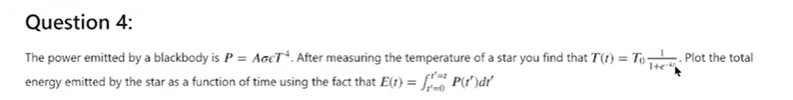

Text(0, 0.5, '$E$')

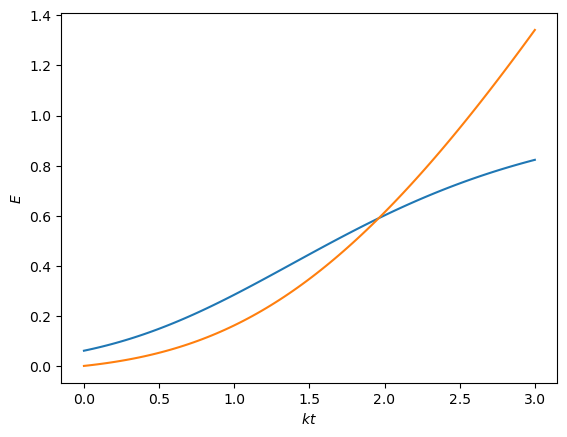

In [156]:
kt = np.linspace(0, 3, 100)
P_new = (1 / (1 + np.exp(-kt))) ** 4

plt.plot(kt, P_new)

E = np.cumsum(P_new) * (kt[1] - kt[0])
plt.plot(kt, E)

plt.xlabel('$kt$')
plt.ylabel('$E$')

#### Multidimensional Arrays

In [161]:
a1 = np.array([
    [1, 2, 3, 4], 
    [5, 6, 7, 8], 
    [9, 10, 11, 12]
])

# You can convert any n-dimensional array to 1d using ravel metjods
a1.ravel()

array([ 9, 10, 11, 12])

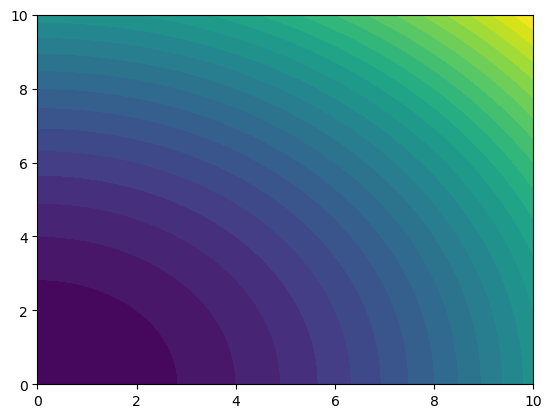

In [165]:
x = np.linspace(0, 10, 1000)
y = np.linspace(0, 10, 1000)

# Using meshgrids 
# This converts x and y into 2 dimensional arrays
xv, yv = np.meshgrid(x, y)

zv = xv ** 2 + yv ** 2

plt.contourf(xv, yv, zv, levels=30)

### Linear Algebra

In [169]:
A = np.array([
    [3, 2, 1], 
    [5, -5, 4], 
    [6, 0, 1]
])
b1 = np.array([1, 2, 3])
b2 = np.array([-1,  2, -5])

# Dot Product
A @ b1

# Transpose 
A.T

# Dot product 
np.dot(b1, b2)

# Cross product 
np.cross(b1, b2)

array([-16,   2,   4])

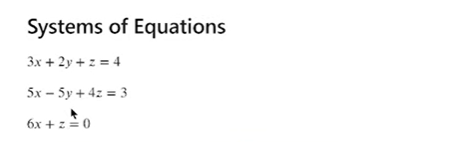

In [170]:
A = np.array([
    [3, 2, 1], 
    [5, -5, 4], 
    [6, 0, 1]
])
b = np.array([4, 3, 0])

# Linear Algebra
np.linalg.solve(A, b) # We get x, y, z

array([-0.49056604,  1.26415094,  2.94339623])

### Finding Eigen Values 

In [176]:
A = np.array([
    [4, 2, 2], 
    [2, 4, 2], 
    [2, 2, 4]
])

eigen_values, eigen_vectors = np.linalg.eig(A)
print(eigen_values)
# Eigen vectors are actually the first elements of vectors
eigen_vector_1 = eigen_vectors[:][0]
eigen_vector_2 = eigen_vectors[:][1]

eigen_vector_1

[2. 8. 2.]


array([-0.81649658,  0.57735027, -0.23513651])

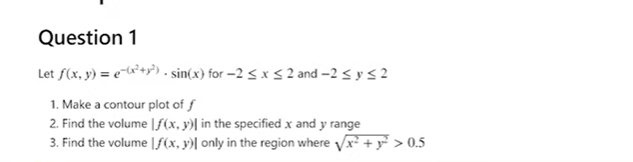

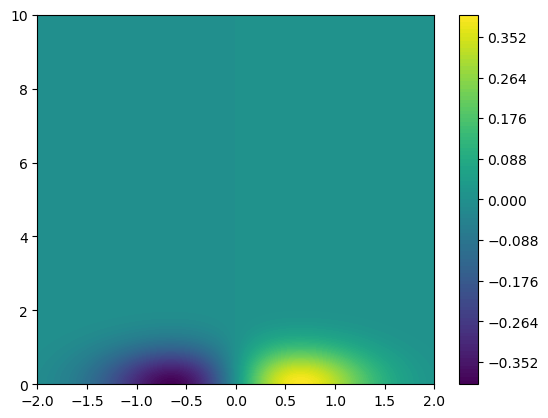

In [189]:
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)

xv, vy = np.meshgrid(x, y)

f = np.exp(-(xv ** 2 + yv ** 2)) * np.sin(xv)

plt.contourf(xv, yv, f, levels=100)
plt.colorbar()

In [193]:
np.abs(f.ravel()).sum() * np.diff(x)[0]

75.00197110771674

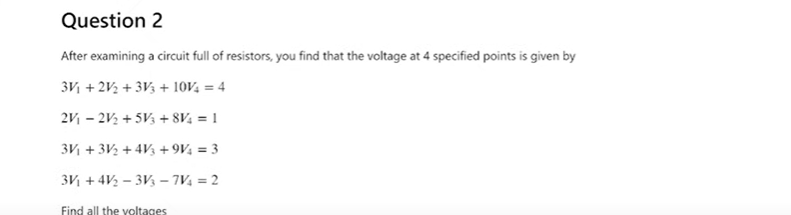

In [197]:
A = np.array([
   [3, 2, 3, 10], 
   [2, -2, 5, 8], 
   [3, 3, 4, 9], 
   [3, 4, -3, -7]
])
b1 = np.array([4, 1, 3, 2])

all_voltages = np.linalg.solve(A, b1)
all_voltages

array([ 0.78378378,  0.03603604, -0.67567568,  0.36036036])

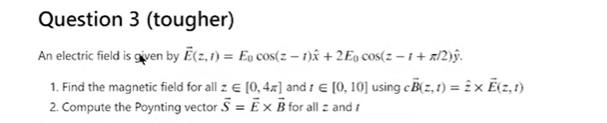

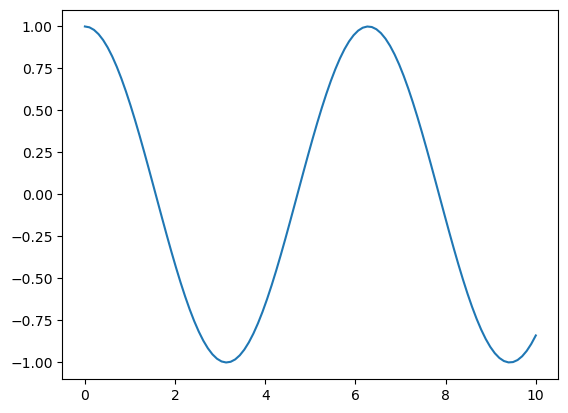

In [199]:
# 1. Defining the value of z
z = np.linspace(0, 4 * np.pi, 100)
t = np.linspace(0, 10, 100)

tv, zv = np.meshgrid(t, z)

Ex = np.cos(zv - tv)
Ey = 2 * np.cos(zv - tv + np.pi/2)
Ez = 0 * tv

plt.plot(t, Ex[0])

E = np.array([Ex, Ey, Ez])

# Now I wanna swap the axis of the array 
E = np.swapaxes(E, 0,  -1)

B = np.cross(np.array([0, 0, 1]), E)

B = np.swapaxes(B, 0, -1)
